In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def evaluate_model(model, X_test, y_test, model_name="Model"):
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)

    print(f"\n{model_name} Metrics:")
    print(f"R² Score: {r2:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")

    # Calculate metrics for tail regions
    low_mask = y_test <= 0.3
    high_mask = y_test >= 0.7

    if low_mask.any():
        low_rmse = np.sqrt(mean_squared_error(y_test[low_mask], y_pred[low_mask]))
        print(f"Low-end (≤0.3) RMSE: {low_rmse:.4f}")

    if high_mask.any():
        high_rmse = np.sqrt(mean_squared_error(y_test[high_mask], y_pred[high_mask]))
        print(f"High-end (≥0.7) RMSE: {high_rmse:.4f}")

    return y_pred

def plot_predictions(y_true, y_pred, weights=None, title="Model Predictions"):
    """Plot predictions with optional weight visualization"""
    plt.figure(figsize=(10, 8))

    if weights is not None:
        scatter = plt.scatter(y_true, y_pred, c=weights, cmap='viridis',
                            alpha=0.6, label='Predictions')
        plt.colorbar(scatter, label='Weight')
    else:
        plt.scatter(y_true, y_pred, alpha=0.6, label='Predictions')

    plt.plot([0, 1], [0, 1], 'r--', lw=2, label='Perfect Prediction')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title(title)

    # Add metrics to plot
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)

    plt.text(0.05, 0.95, f'R² = {r2:.3f}\nRMSE = {rmse:.3f}\nMAE = {mae:.3f}',
             transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.8))

    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()
    plt.show()

def plot_feature_importances(model, feature_names, title="Feature Importances"):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.bar(range(len(importances)), importances[indices])
    plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    print(f"\n{title}:")
    for idx in indices:
        print(f"{feature_names[idx]}: {importances[idx]:.4f}")
    pass

def plot_feature_importances(model, feature_names, title="Feature Importances"):
    print("DELETE THIS FUNCTION IF YOU WANT FEATURE IMPORTANCES")

filepath = '../data/E-INSPIRE_I_master_catalogue.csv'




Base Model Evaluation:

Base Model Metrics:
R² Score: 0.7911
RMSE: 0.0742
MAE: 0.0549
Low-end (≤0.3) RMSE: 0.0929
High-end (≥0.7) RMSE: 0.1540


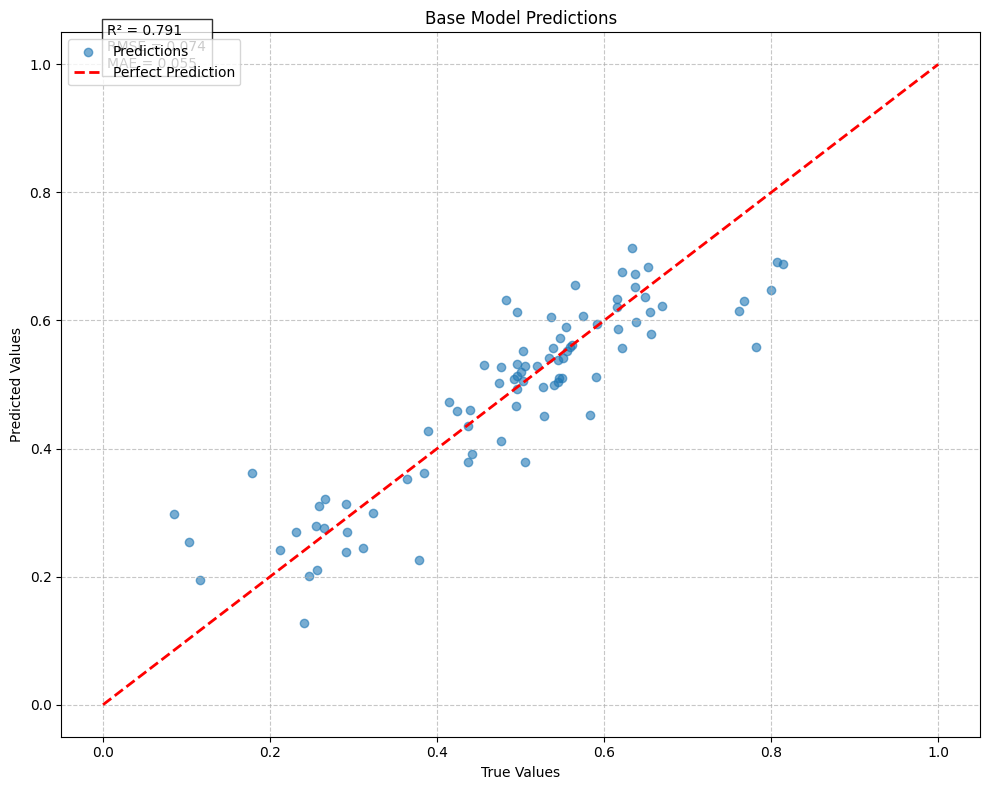

DELETE THIS FUNCTION IF YOU WANT FEATURE IMPORTANCES


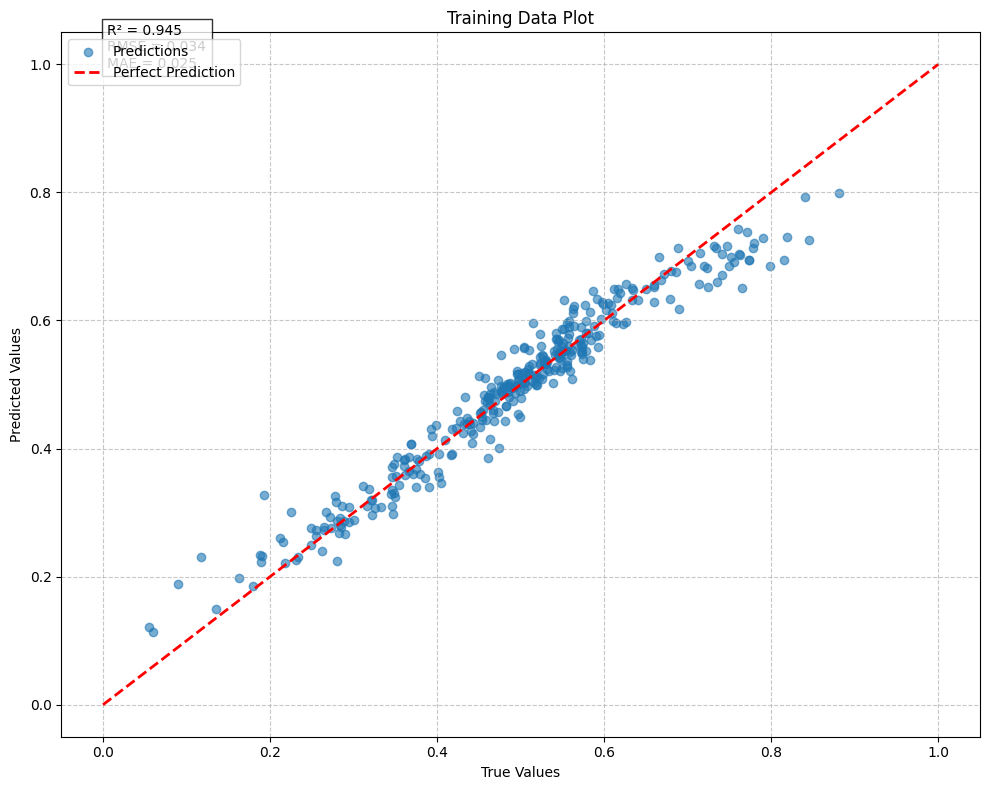

(RandomForestRegressor(max_depth=20, max_features=0.7, min_samples_split=5,
                       n_estimators=500, random_state=42),
 StandardScaler())

In [30]:
def run_base_model(filepath):
    # Load data
    df = pd.read_csv(filepath)
    standard_features = ['MgFe', '[M/H]_mean_mass', 'velDisp_ppxf_res', 'age_mean_mass']
    X = df[standard_features]
    y = df['DoR']
    
    # Split and scale data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train model
    base_model = RandomForestRegressor(
        n_estimators=500,
        max_depth=20,
        min_samples_split=5,
        max_features=0.7,
        random_state=42
    )
    base_model.fit(X_train_scaled, y_train)
    
    # Evaluate and plot
    print("\nBase Model Evaluation:")
    y_pred = evaluate_model(base_model, X_test_scaled, y_test, "Base Model")
    plot_predictions(y_test, y_pred, title="Base Model Predictions")
    plot_feature_importances(base_model, standard_features)
    
    plot_predictions(y_train, base_model.predict(X_train_scaled), title="Training Data Plot")

    return base_model, scaler

run_base_model(filepath)


Model with Error Features Evaluation:

Error Features Model Metrics:
R² Score: 0.8030
RMSE: 0.0721
MAE: 0.0544
Low-end (≤0.3) RMSE: 0.0891
High-end (≥0.7) RMSE: 0.1167


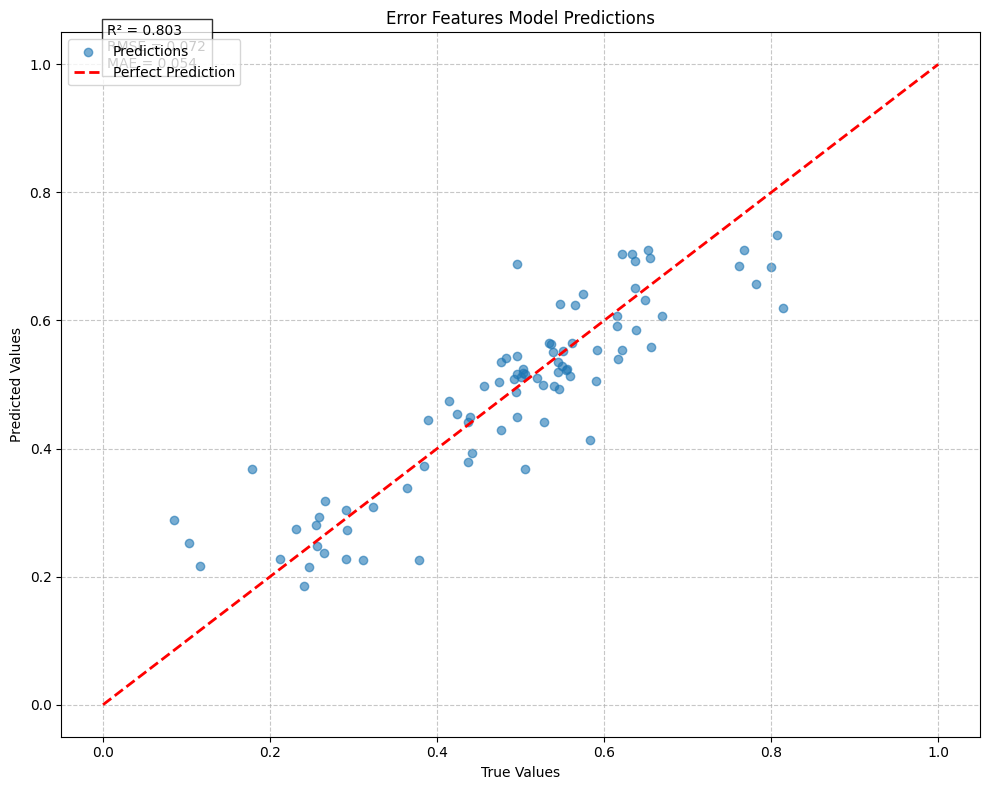

DELETE THIS FUNCTION IF YOU WANT FEATURE IMPORTANCES


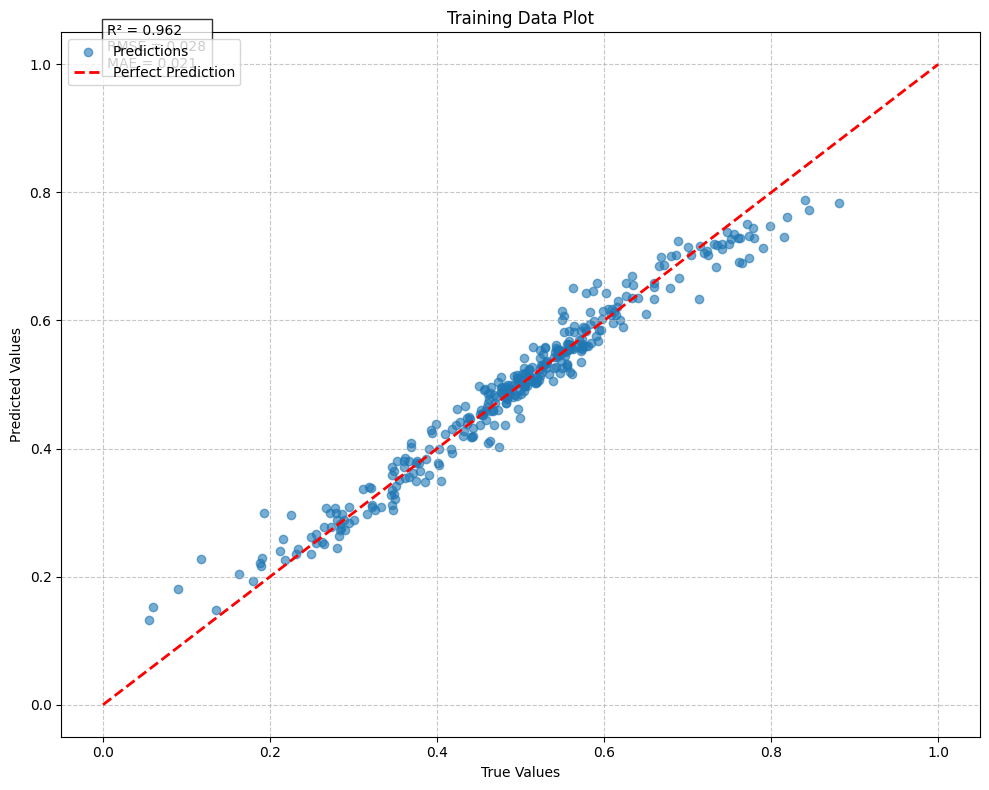

(RandomForestRegressor(max_depth=20, max_features=0.7, min_samples_split=5,
                       n_estimators=500, random_state=42),
 StandardScaler())

In [31]:
def run_error_feature_model(filepath):
    # Load data
    df = pd.read_csv(filepath)
    features_with_errors = [
        'MgFe',
        '[M/H]_mean_mass', '[M/H]_err_mass',
        'velDisp_ppxf_res', 'velDisp_ppxf_err_res',
        'age_mean_mass', 'age_err_mass'
    ]
    X = df[features_with_errors]
    y = df['DoR']
    
    # Split and scale data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train model
    error_model = RandomForestRegressor(
        n_estimators=500,
        max_depth=20,
        min_samples_split=5,
        max_features=0.7,
        random_state=42
    )
    error_model.fit(X_train_scaled, y_train)
    
    # Evaluate and plot
    print("\nModel with Error Features Evaluation:")
    y_pred = evaluate_model(error_model, X_test_scaled, y_test, "Error Features Model")
    plot_predictions(y_test, y_pred, title="Error Features Model Predictions")
    plot_feature_importances(error_model, features_with_errors)
    
    plot_predictions(y_train, error_model.predict(X_train_scaled), title="Training Data Plot")
    
    return error_model, scaler

run_error_feature_model(filepath)


Weighted Points Model Evaluation:

Weighted Points Model Metrics:
R² Score: 0.7952
RMSE: 0.0735
MAE: 0.0553
Low-end (≤0.3) RMSE: 0.0908
High-end (≥0.7) RMSE: 0.1424


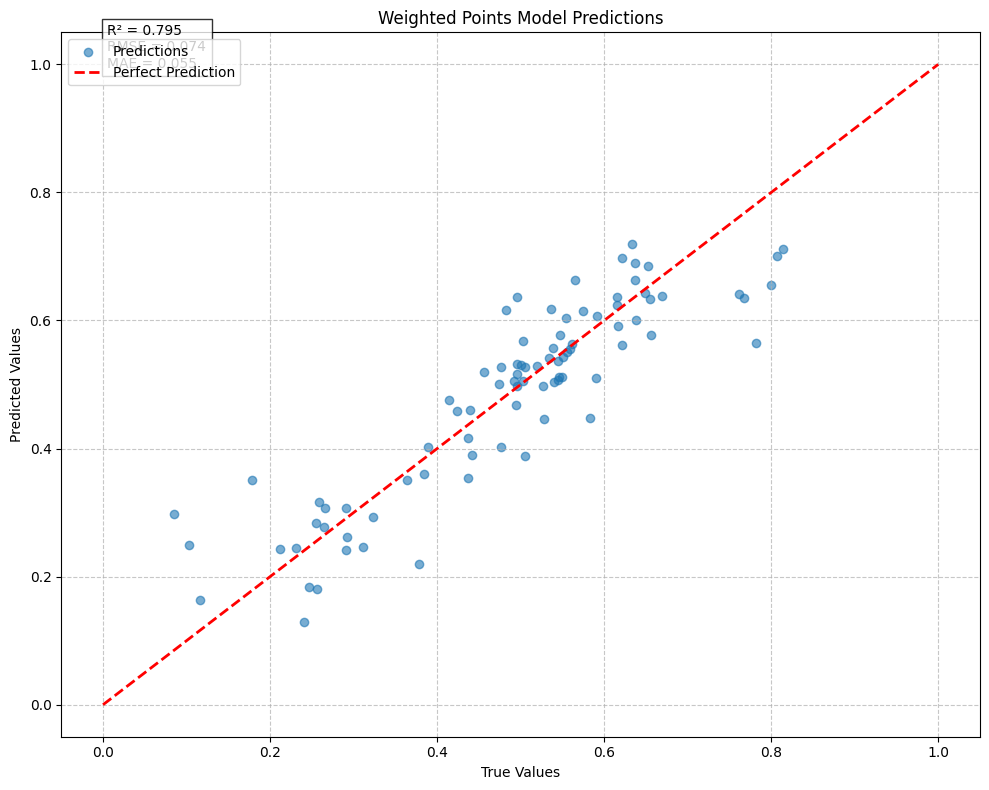

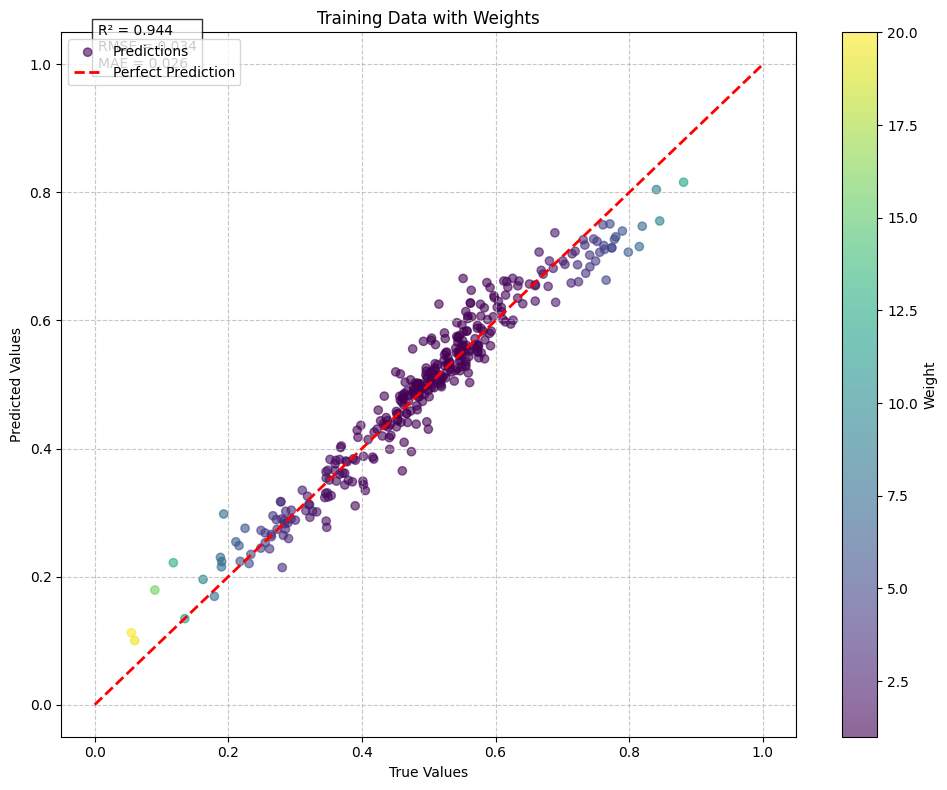

DELETE THIS FUNCTION IF YOU WANT FEATURE IMPORTANCES


(RandomForestRegressor(max_depth=20, max_features=0.7, min_samples_split=5,
                       n_estimators=500, random_state=42),
 StandardScaler(),
 66     1.021588
 132    1.000015
 407    3.628456
 31     1.000019
 84     3.526833
          ...   
 71     1.025039
 106    4.095466
 270    1.133410
 348    1.000078
 102    1.283563
 Name: DoR, Length: 344, dtype: float64)

In [32]:
def run_weighted_points_model(filepath):
    # Load data
    df = pd.read_csv(filepath)
    standard_features = ['MgFe', '[M/H]_mean_mass', 'velDisp_ppxf_res', 'age_mean_mass']
    X = df[standard_features]
    y = df['DoR']
    
    # Split and scale data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Calculate weights
    mean_y = np.median(y_train)
    distances = np.abs(y_train - mean_y)
    weights = 1 + (distances / np.max(distances))**3 * (20.0 - 1)
    
    # Train weighted model
    weighted_model = RandomForestRegressor(
        n_estimators=500,
        max_depth=20,
        min_samples_split=5,
        max_features=0.7,
        random_state=42
    )
    weighted_model.fit(X_train_scaled, y_train, sample_weight=weights)
    
    # Evaluate and plot
    print("\nWeighted Points Model Evaluation:")
    y_pred = evaluate_model(weighted_model, X_test_scaled, y_test, "Weighted Points Model")
    plot_predictions(y_test, y_pred, title="Weighted Points Model Predictions")
    plot_predictions(y_train, weighted_model.predict(X_train_scaled), 
                    weights=weights, title="Training Data with Weights")
    
    plot_feature_importances(weighted_model, standard_features)
    
    return weighted_model, scaler, weights

run_weighted_points_model(filepath)


Polynomial Features Model Evaluation:

Polynomial Features Model Metrics:
R² Score: 0.7962
RMSE: 0.0733
MAE: 0.0557
Low-end (≤0.3) RMSE: 0.0917
High-end (≥0.7) RMSE: 0.1408


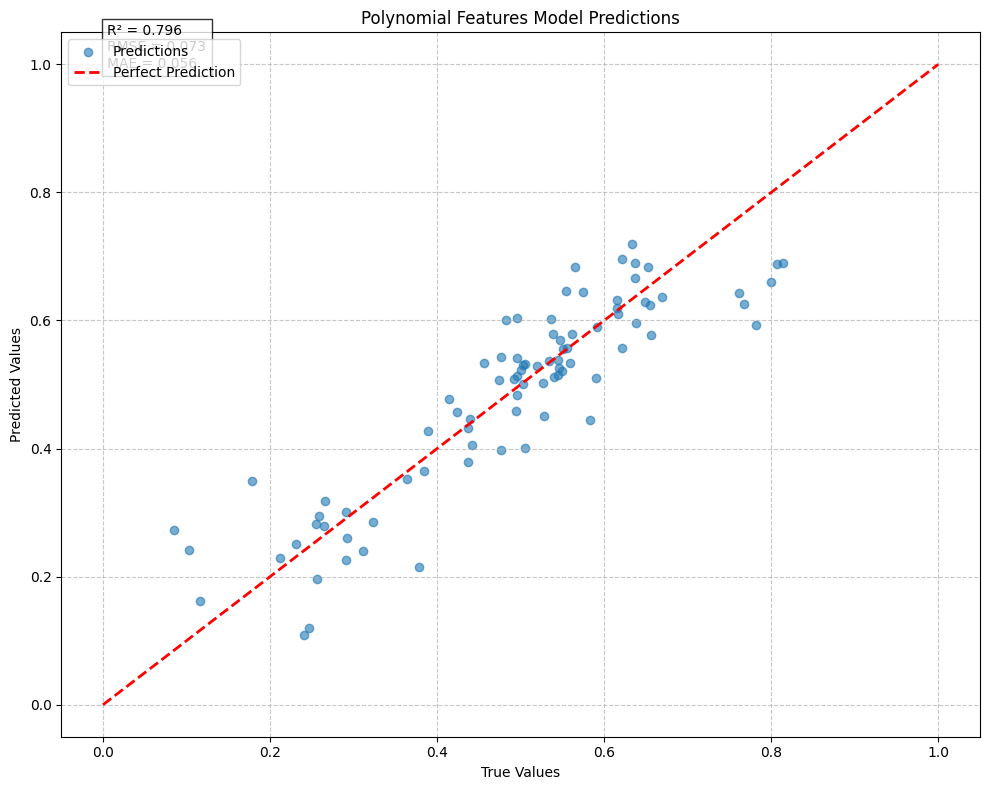

DELETE THIS FUNCTION IF YOU WANT FEATURE IMPORTANCES


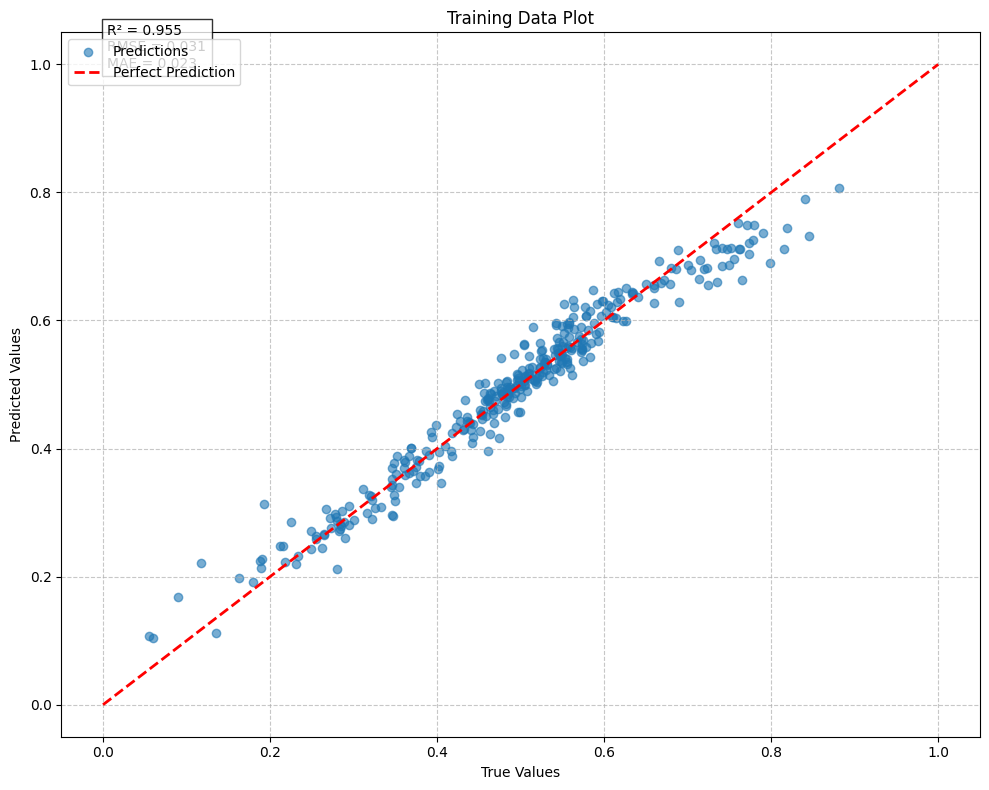

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()),
                ('rf',
                 RandomForestRegressor(max_depth=20, max_features=0.7,
                                       min_samples_split=5, n_estimators=500,
                                       random_state=42))])

In [33]:
def run_polynomial_model(filepath):
    # Load data
    df = pd.read_csv(filepath)
    standard_features = ['MgFe', '[M/H]_mean_mass', 'velDisp_ppxf_res', 'age_mean_mass']
    X = df[standard_features]
    y = df['DoR']
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create and train polynomial model
    poly_model = Pipeline([
        ('poly', PolynomialFeatures(degree=2, include_bias=False)),
        ('scaler', StandardScaler()),
        ('rf', RandomForestRegressor(
            n_estimators=500,
            max_depth=20,
            min_samples_split=5,
            max_features=0.7,
            random_state=42
        ))
    ])
    
    poly_model.fit(X_train, y_train)
    
    # Evaluate and plot
    print("\nPolynomial Features Model Evaluation:")
    y_pred = evaluate_model(poly_model, X_test, y_test, "Polynomial Features Model")
    plot_predictions(y_test, y_pred, title="Polynomial Features Model Predictions")
    
    # Get feature names for polynomial features
    poly_features = poly_model.named_steps['poly'].get_feature_names_out(standard_features)
    plot_feature_importances(poly_model.named_steps['rf'], poly_features)
    
    plot_predictions(y_train, poly_model.predict(X_train), title="Training Data Plot")

    return poly_model

run_polynomial_model(filepath)